### **Name**: **Meherun Mehnaj Miti**
### **ID: 0152330122**

# **Dataset Information**

**Dataset Name:** Pyramids of Ancient Egypt

*   Context: A combined list of Ancient Egyptian pyramids starting from 3th Dynasty.

*   Feature Numbers: 16
*   Number of Rows: 1400

**Source:** Kaggle

**Dataset Drive Link:** https://drive.google.com/file/d/1cVjutfhCAspoVJR-l1MQJ6oulI733BmQ/view?usp=sharing

---





## **Dataset Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FDS Assignment Dataset/pyramids.csv')
df.head()

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,NaN,330.4,29.871215,31.216644,Step,XXXII,Mudbrick,NaN
1,Sekhemkhet,-,Buried Pyramid,3,Saqqara,120.0,120.0,70.0,NaN,33.6,29.866000,31.213000,Step,NaN,Mudbrick,(unfinished)
2,Khaba (?),-,Layer Pyramid,3,Zawyet el'Aryan,84.0,84.0,40.0,NaN,47.04,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,-,Pyramid Lepsius I,3,Abu Rawash,215.0,215.0,145.0,NaN,NaN,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),-,Pyramid of Athribis,3,Athribis,20.0,20.0,16.0,50.0,NaN,30.470556,31.188056,Step,NaN,Mudbrick,NaN


### **Details**

In [ ]:
print(f"Number of Columns: {df.shape[1]}\nNumber of Rows: {df.shape[0]}")
print(f"Number of Cells: {df.size}\n\n")

print(f"List of Null values: \n{df.isnull().sum()}")

Number of Columns: 16
Number of Rows: 1400
Number of Cells: 22400


List of Null values: 
Pharaoh               0
Ancient name          0
Modern name           0
Dynasty               0
Site                  0
Base1 (m)             0
Base2 (m)             0
Height (m)          195
Slope (dec degr)     19
Volume (cu.m)       215
Latitude              0
Longitude             0
Type                  0
Lepsius             397
Material              1
Comment             936
dtype: int64


In [ ]:
df.describe()

,Dynasty,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Latitude,Longitude
count,1400.000000,1400.000000,1400.000000,1205.000000,1381.000000,1400.000000,1400.000000
mean,6.399286,81.120153,80.691567,49.567969,55.581684,29.239965,31.311053
std,3.876009,56.662323,56.224147,36.232838,9.785525,1.451760,0.429950
min,3.000000,13.092065,13.095093,-3.009462,33.000000,24.076784,30.819593
25%,4.000000,39.943136,42.380207,21.268869,51.753986,29.580029,31.135677
50%,5.000000,73.848479,73.390088,45.570486,53.130000,29.850651,31.210127
75%,8.000000,104.320336,104.466776,61.694517,56.567251,29.938146,31.222015
max,18.000000,234.894916,235.033578,155.874058,82.000000,30.480482,32.893836


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pharaoh           1400 non-null   object 
 1   Ancient name      1400 non-null   object 
 2   Modern name       1400 non-null   object 
 3   Dynasty           1400 non-null   int64  
 4   Site              1400 non-null   object 
 5   Base1 (m)         1400 non-null   float64
 6   Base2 (m)         1400 non-null   float64
 7   Height (m)        1205 non-null   float64
 8   Slope (dec degr)  1381 non-null   float64
 9   Volume (cu.m)     1185 non-null   object 
 10  Latitude          1400 non-null   float64
 11  Longitude         1400 non-null   float64
 12  Type              1400 non-null   object 
 13  Lepsius           1003 non-null   object 
 14  Material          1399 non-null   object 
 15  Comment           464 non-null    object 
dtypes: float64(6), int64(1), object(9)
memory 

### **Exploratory Data Analysis (EDA) on the Dataset**

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

Comment             66.857143
Lepsius             28.357143
Volume (cu.m)       15.357143
Height (m)          13.928571
Slope (dec degr)     1.357143
Material             0.071429
dtype: float64


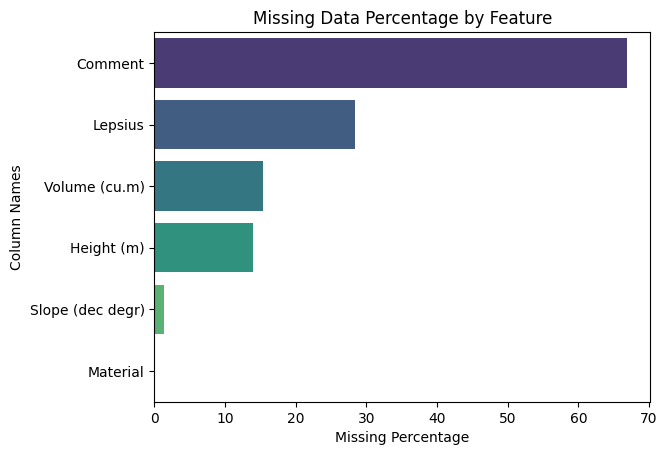

In [ ]:
#Plot for null values

null = [features for features in df.columns if df[features].isnull().sum() > 0]
percent = df[null].isnull().sum().sort_values(ascending=False) / len(df) * 100
print(percent)


sns.barplot(x=percent.values, y=percent.index, hue=percent.index, palette="viridis", dodge=False, legend=False)
plt.xlabel('Missing Percentage')
plt.ylabel('Column Names')
plt.title('Missing Data Percentage by Feature')
plt.show()

#Comment has the most numbers of Missing Values

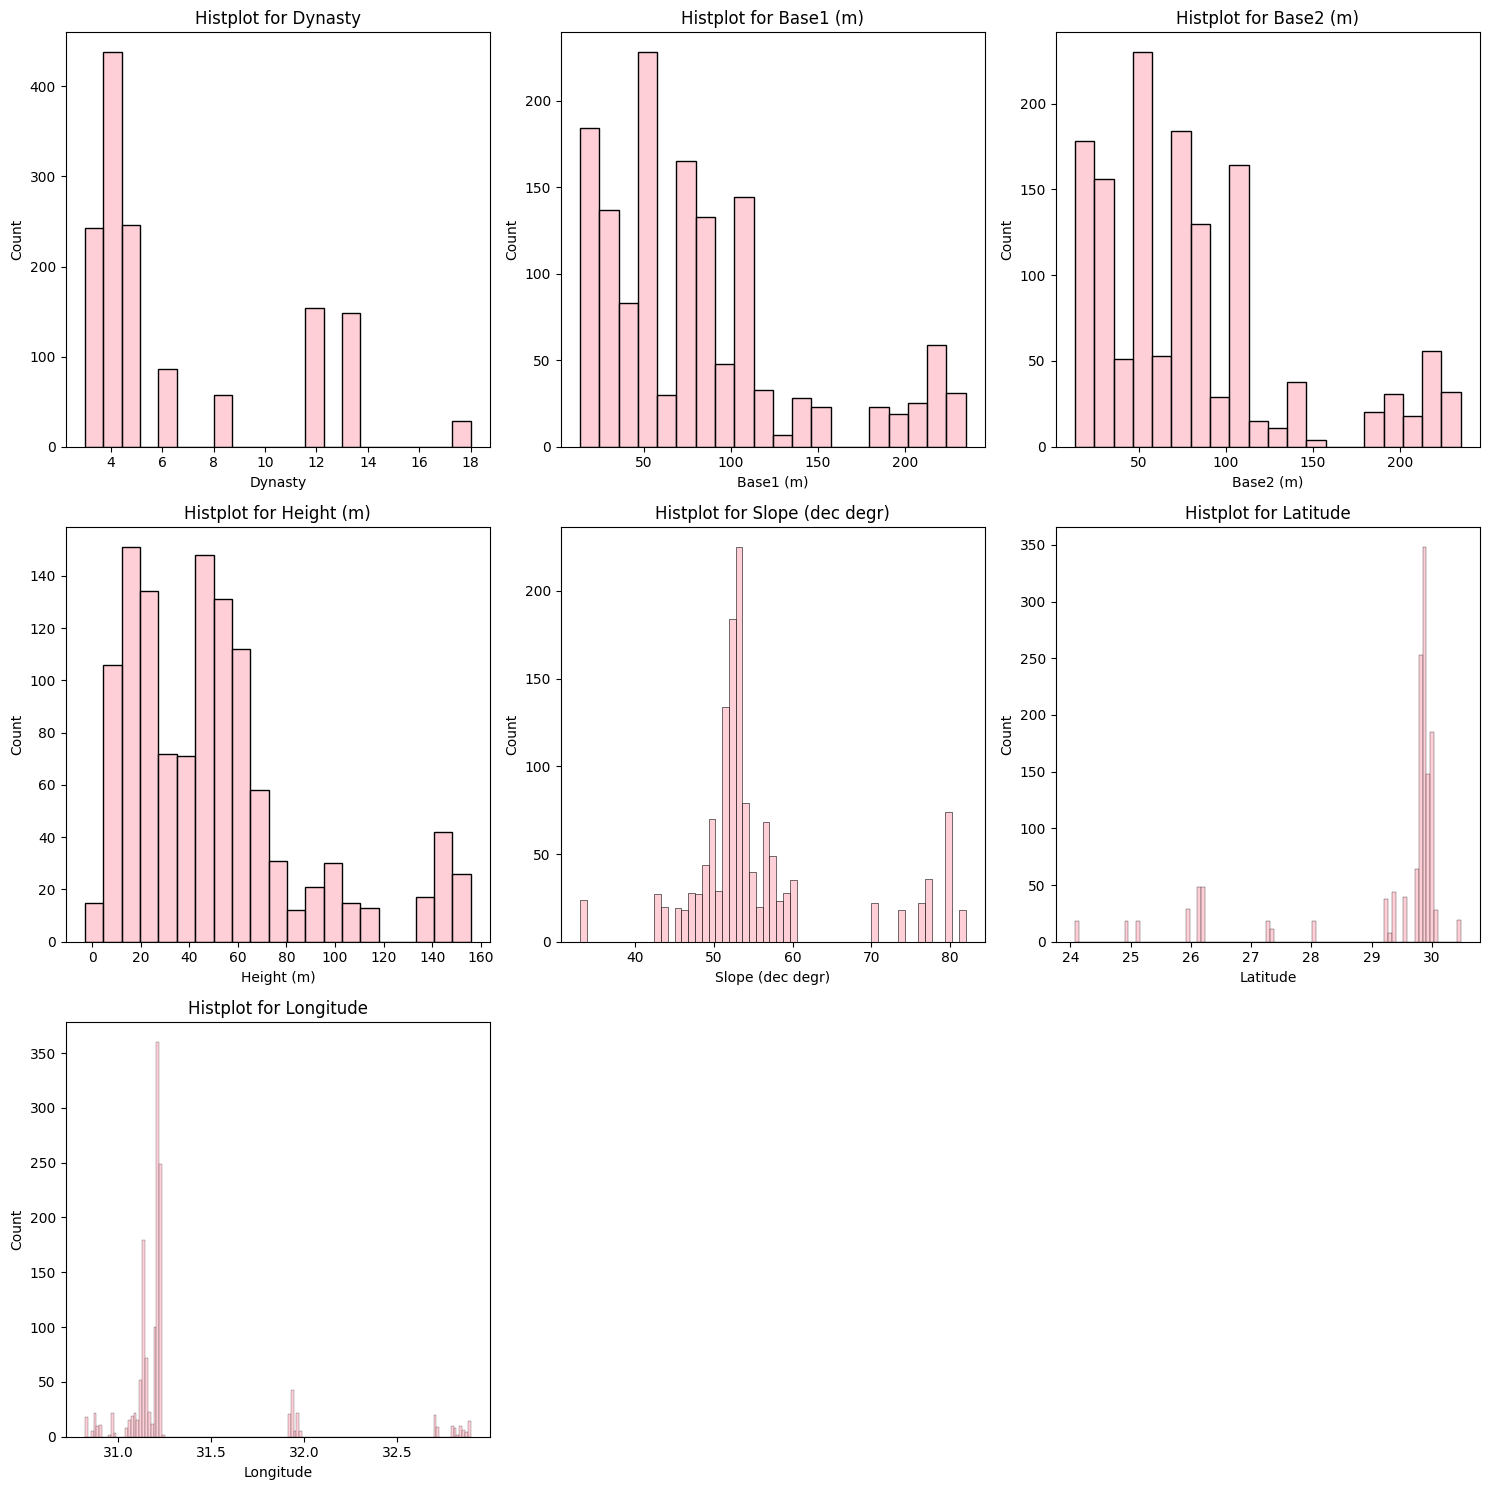

In [ ]:
#Histogram for distributions

num_cols=len(df.select_dtypes(include="number").columns)
num_rows =(num_cols + 2)//3

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(df.select_dtypes(include="number").columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=df, x=col, color="pink")
    plt.title(f'Histplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

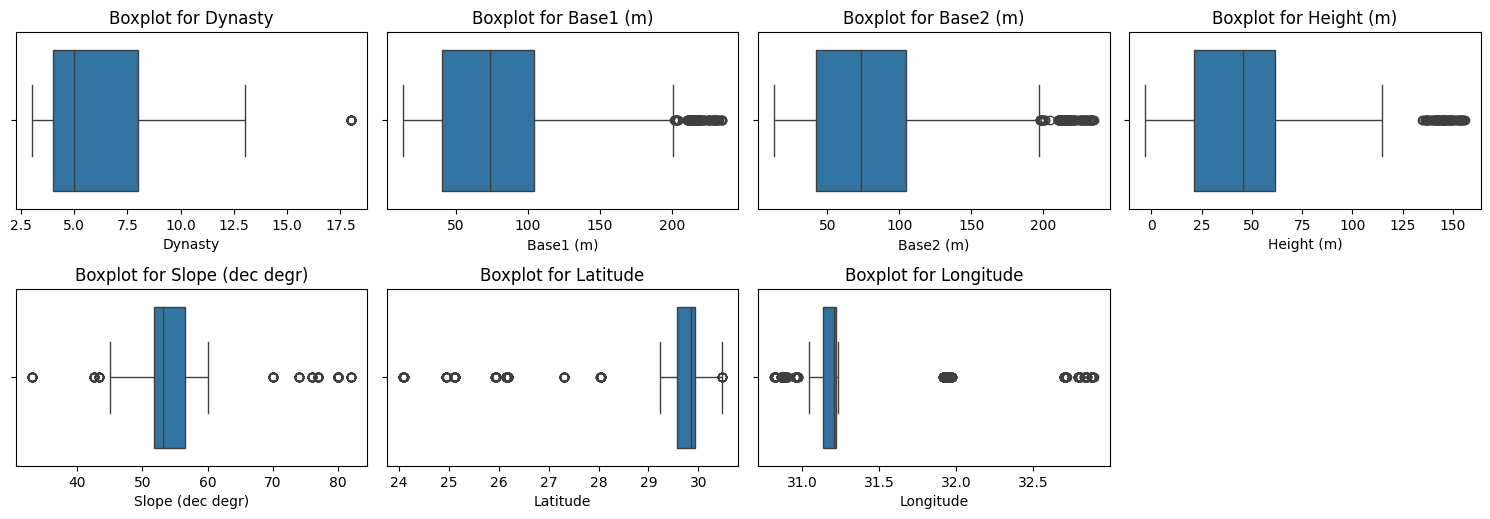

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))


for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


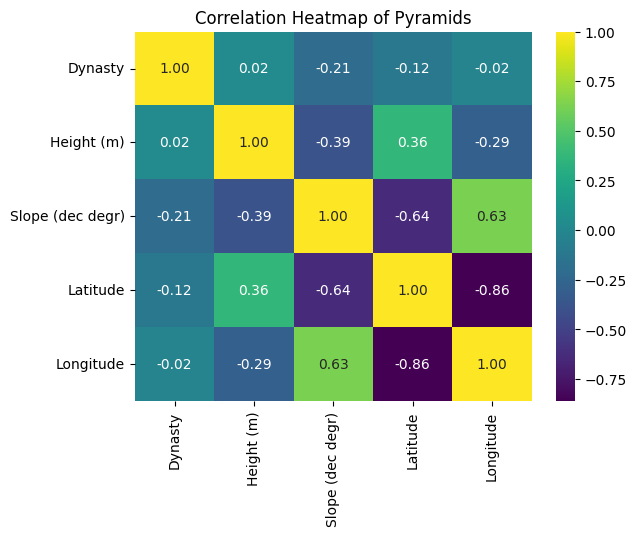

In [ ]:
#Correlation Heatmap of the DataSet
new_df=df[["Dynasty","Volume (cu.m)","Height (m)","Slope (dec degr)", "Latitude","Longitude"]]
c=new_df.select_dtypes(include=['float64', 'int64'])
correlation = c.corr()
sns.heatmap(correlation,annot=True, fmt=".2f", cmap='viridis' )
plt.title('Correlation Heatmap of Pyramids')
plt.show()

**Strong Positive Correlation (≥ 0.7)**

Volume (cu.m) and Height (m): 0.88

**Strong Negative Correlation (≤ -0.7)**

Latitude and Longitude: -0.86

**Weak Positive Correlation (0.1 to 0.3)**

Volume (cu.m) and Latitude: 0.20

Height (m) and Latitude: 0.36

Slope (dec degr) and Longitude: 0.66

**Weak Negative Correlation (-0.1 to -0.3)**

Dynasty and Volume (cu.m): -0.19

Dynasty and Slope (dec degr): -0.20

Dynasty and Longitude: -0.10

Volume (cu.m) and Longitude: -0.17

Height (m) and Longitude: -0.30

**Zero Correlation (Close to 0)**

Dynasty and Height (m): 0.02

Dynasty and Latitude: -0.03


### **Data Cleaning**

Handling Missing Values

In [ ]:
df.drop_duplicates(inplace=True)

df["Ancient name"]=df['Ancient name'].replace("-","Unknown") #Replaced the missing data represented with "-" with "Unknown"
df["Lepsius"]=df['Lepsius'].replace(np.nan,"Unknown")  #Replaced the missing data with "Unknown"
df["Comment"]=df['Comment'].replace(np.nan,"No comment available")  #Replaced the missing data with "Unknown"
df.dropna(subset=['Height (m)'], inplace=True) #Dropped the 9 rows with missing heights
df=df[df["Height (m)"] >= 0] #Dropping rows with height values which are 0 or negative
df.head(5)



,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,NaN,330.4,29.871215,31.216644,Step,XXXII,Mudbrick,No comment available
1,Sekhemkhet,Unknown,Buried Pyramid,3,Saqqara,120.0,120.0,70.0,NaN,33.6,29.866000,31.213000,Step,Unknown,Mudbrick,(unfinished)
2,Khaba (?),Unknown,Layer Pyramid,3,Zawyet el'Aryan,84.0,84.0,40.0,NaN,47.04,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,Unknown,Pyramid Lepsius I,3,Abu Rawash,215.0,215.0,145.0,NaN,NaN,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),Unknown,Pyramid of Athribis,3,Athribis,20.0,20.0,16.0,50.0,NaN,30.470556,31.188056,Step,Unknown,Mudbrick,No comment available


In [ ]:
#Volume Calculations

df["Volume (cu.m)"]=pd.to_numeric(df["Volume (cu.m)"],errors='coerce')
missing_volume=(1/3)*df['Base1 (m)']*df['Base2 (m)']*df['Height (m)']
df["Volume (cu.m)"]=(missing_volume).round() #Re-calculated the volume values and replaced the values



df.head()


,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,NaN,263780.0,29.871215,31.216644,Step,XXXII,Mudbrick,No comment available
1,Sekhemkhet,Unknown,Buried Pyramid,3,Saqqara,120.0,120.0,70.0,NaN,336000.0,29.866000,31.213000,Step,Unknown,Mudbrick,(unfinished)
2,Khaba (?),Unknown,Layer Pyramid,3,Zawyet el'Aryan,84.0,84.0,40.0,NaN,94080.0,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,Unknown,Pyramid Lepsius I,3,Abu Rawash,215.0,215.0,145.0,NaN,2234208.0,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),Unknown,Pyramid of Athribis,3,Athribis,20.0,20.0,16.0,50.0,2133.0,30.470556,31.188056,Step,Unknown,Mudbrick,No comment available


In [ ]:
#Slope Calculations

avg_base=(df['Base1 (m)']+df['Base2 (m)'])/2
slope=np.degrees(np.arctan(df['Height (m)']/(avg_base/ 2)))
df['Slope (dec degr)']=df['Slope (dec degr)'].fillna(slope).round()

df.head(5)

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,46.0,263780.0,29.871215,31.216644,Step,XXXII,Mudbrick,No comment available
1,Sekhemkhet,Unknown,Buried Pyramid,3,Saqqara,120.0,120.0,70.0,49.0,336000.0,29.866000,31.213000,Step,Unknown,Mudbrick,(unfinished)
2,Khaba (?),Unknown,Layer Pyramid,3,Zawyet el'Aryan,84.0,84.0,40.0,44.0,94080.0,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,Unknown,Pyramid Lepsius I,3,Abu Rawash,215.0,215.0,145.0,53.0,2234208.0,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),Unknown,Pyramid of Athribis,3,Athribis,20.0,20.0,16.0,50.0,2133.0,30.470556,31.188056,Step,Unknown,Mudbrick,No comment available


Removing Outliers

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_cols = df.select_dtypes(include=['number']).columns
df_no_outliers = df.copy()
for col in numerical_cols:
    df_no_outliers = remove_outliers(df_no_outliers, col)

In [ ]:
df["Type"]=df["Type"].str.title()
df.head()

,Pharaoh,Ancient name,Modern name,Dynasty,Site,Base1 (m),Base2 (m),Height (m),Slope (dec degr),Volume (cu.m),Latitude,Longitude,Type,Lepsius,Material,Comment
0,Djoser,Hiemlender,Step Pyramid of Djoser,3,Saqqara,121.0,109.0,60.0,46.0,263780.0,29.871215,31.216644,Step,XXXII,Mudbrick,No comment available
1,Sekhemkhet,Unknown,Buried Pyramid,3,Saqqara,120.0,120.0,70.0,49.0,336000.0,29.866000,31.213000,Step,Unknown,Mudbrick,(unfinished)
2,Khaba (?),Unknown,Layer Pyramid,3,Zawyet el'Aryan,84.0,84.0,40.0,44.0,94080.0,29.932820,31.161262,Step,XIV,Mudbrick,(unfinished)
3,Huni,Unknown,Pyramid Lepsius I,3,Abu Rawash,215.0,215.0,145.0,53.0,2234208.0,30.040833,31.094444,Step,I,Mudbrick,totally ruined
4,Huni (?),Unknown,Pyramid of Athribis,3,Athribis,20.0,20.0,16.0,50.0,2133.0,30.470556,31.188056,Step,Unknown,Mudbrick,No comment available


In [ ]:
#After Cleaning Dataset info

print(f"Number of Columns: {df.shape[1]}\nNumber of Rows: {df.shape[0]}")
print(f"Number of Cells: {df.size}\n\n")


Number of Columns: 16
Number of Rows: 1202
Number of Cells: 19232




In [ ]:
df.isnull().sum().sum()

0

### **Exploratory Data Analysis (EDA) on Cleaned Dataset**

In [ ]:
#Number of Pyramids in Egypt by Sites


site_counts = df['Site'].value_counts().reset_index()
site_counts.columns = ['Site', 'Number of Pyramids']

fig=px.bar(site_counts,y='Site',x='Number of Pyramids',orientation='h',color='Number of Pyramids',width=1000,height=500,title='Count of Pyramids by Site',color_continuous_scale='Spectral')

fig.update_layout(xaxis_title='Number of Pyramids',yaxis_title='Site Names',yaxis=dict(categoryorder='total ascending'),)
fig.show()

#GIZA HAS THE MOST NUMBERS OF PYRAMIDS

In [ ]:
#Type of Pyramids

types = df['Type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=types.index,values=types.values,hoverinfo='label+percent',textinfo='percent',textfont_size=14,
                             marker=dict(colors=["pink", "skyblue", "#9EA1D4", "#F1F7B5", "#CCFFCC", "#FFDAB9"], line=dict(color='grey', width=1)))])

fig.update_layout(title_text='Pyramid Types',title_x=0.45,width=600,height=500,margin=dict(l=50, r=50, t=50, b=50))

fig.show()

#The 'True' type of pyramids constitutes the largest proportion among all pyramid types.

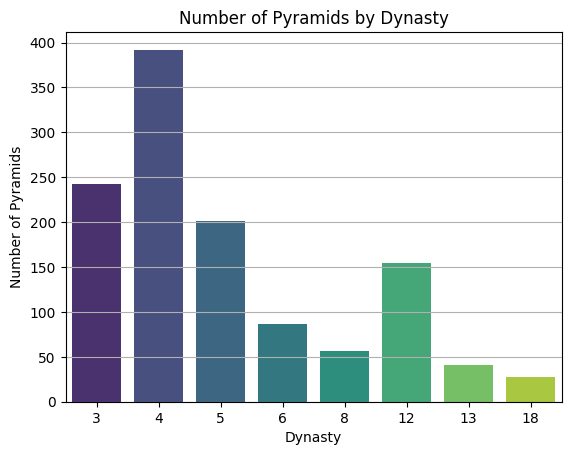

In [ ]:
#Number of Pyramids by Dynasty


dynasty_counts = df['Dynasty'].value_counts()
sns.barplot(x=dynasty_counts.index, y=dynasty_counts.values, palette='viridis')
plt.title('Number of Pyramids by Dynasty')
plt.xlabel('Dynasty')
plt.ylabel('Number of Pyramids')
plt.xticks()
plt.grid(axis='y')
plt.show()
#Dynasty 4 made the most number of Pyramids

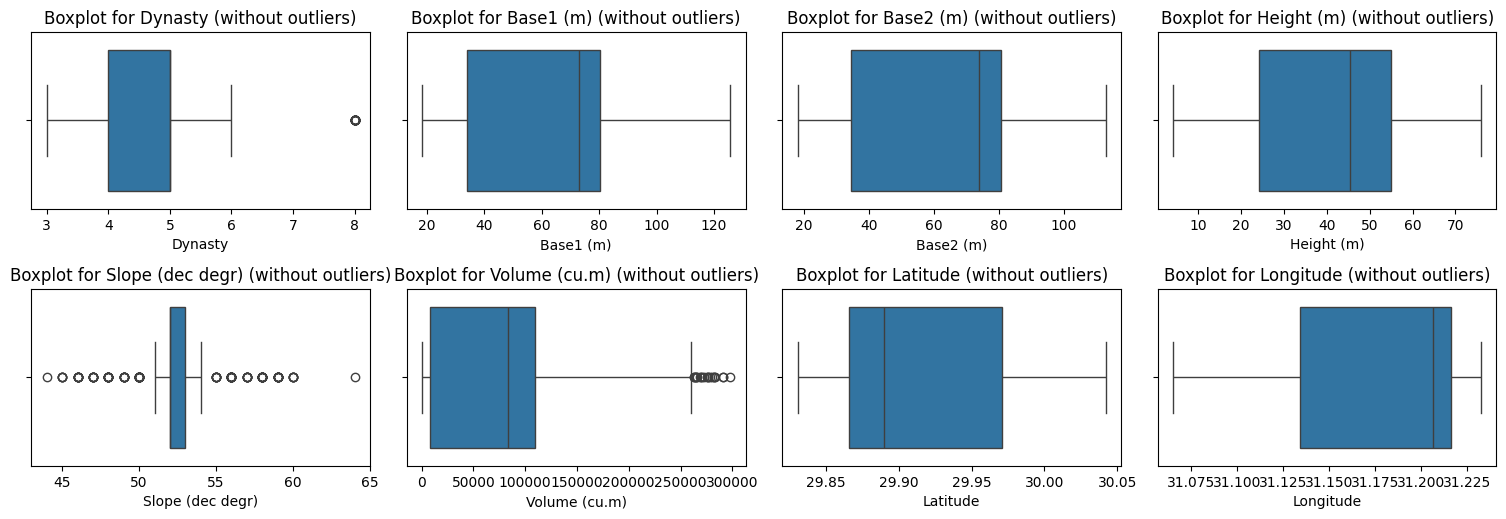

In [ ]:
#Without Outliers


plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot for {col} (without outliers)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

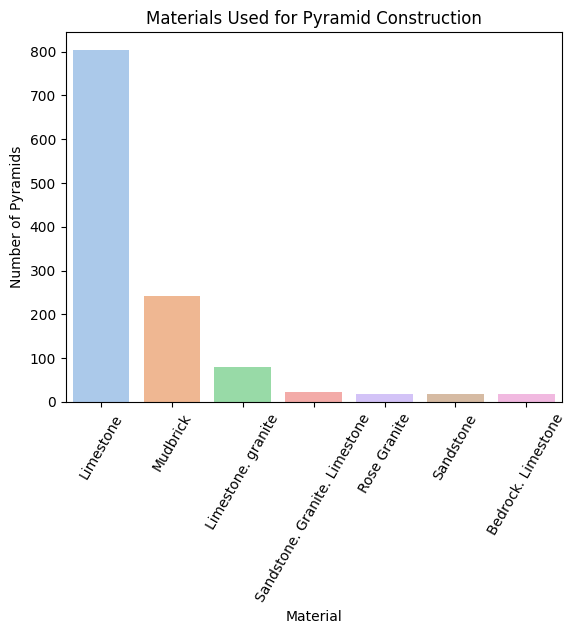

In [ ]:
#Materials used for Pyramid Construction

material_counts = df['Material'].value_counts()
sns.barplot(x=material_counts.index, y=material_counts.values, palette='pastel')
plt.title('Materials Used for Pyramid Construction')
plt.xlabel('Material')
plt.ylabel('Number of Pyramids')
plt.xticks(rotation=60)
plt.show()

#Limestones were used the most for the construction of pyramids.

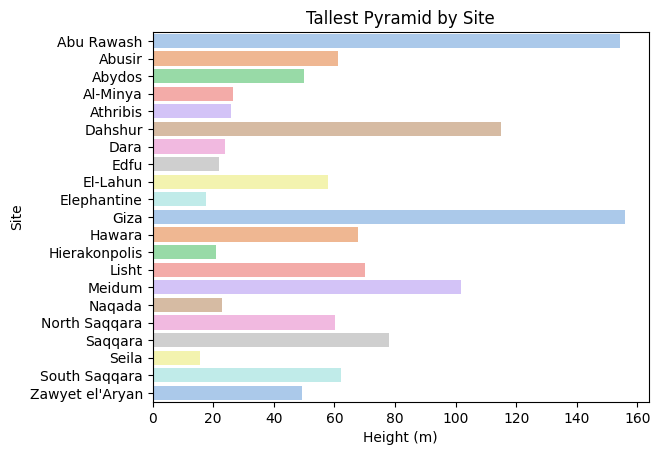

In [ ]:
#Tallest Pyramid

tallest_pyramids=df.loc[df.groupby('Site')['Height (m)'].idxmax()]
sns.barplot(x='Height (m)', y='Site', data=tallest_pyramids, palette="pastel")
plt.title('Tallest Pyramid by Site')
plt.xlabel('Height (m)')
plt.ylabel('Site')
plt.show()





#Giza has the tallest Pyramid

In [ ]:
#Geographical Distribution of Pyramids in Egypt")


map = px.scatter_mapbox(df,lat="Latitude",lon="Longitude",hover_name="Modern name", hover_data=["Pharaoh", "Site", "Height (m)"], color="Site",
size="Height (m)", zoom=9, mapbox_style="open-street-map",width=800,height=800,title="Geographical Distribution of Pyramids in Egypt")

map.show()


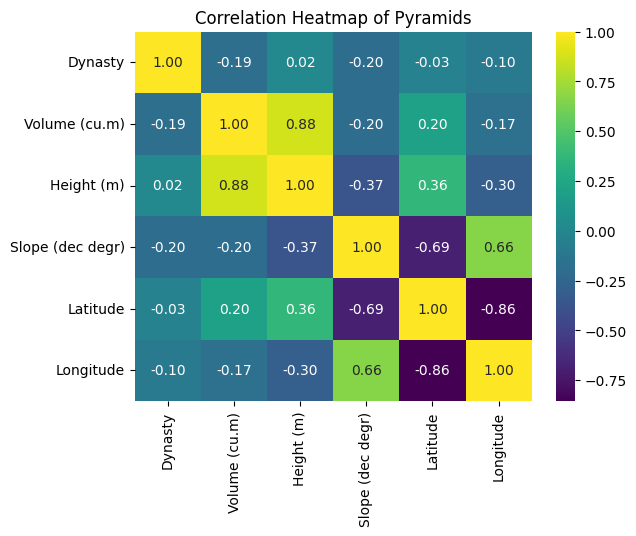

In [ ]:
#Correlation Heatmap of the DataSet
new_df=df[["Dynasty","Volume (cu.m)","Height (m)","Slope (dec degr)", "Latitude","Longitude"]]
c=new_df.select_dtypes(include=['float64', 'int64'])
correlation = c.corr()
sns.heatmap(correlation,annot=True, fmt=".2f", cmap='viridis' )
plt.title('Correlation Heatmap of Pyramids')
plt.show()

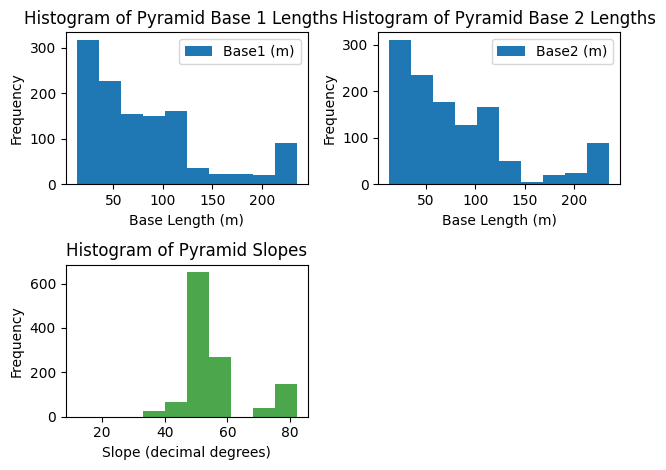

In [ ]:
#Histogram for Height, base and slope distribution

plt.subplot(2, 2, 1)
plt.hist(df['Base1 (m)'], bins=10, label='Base1 (m)')
plt.xlabel('Base Length (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Pyramid Base 1 Lengths  ')

plt.tight_layout()
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['Base2 (m)'], bins=10,  label='Base2 (m)')

plt.xlabel('Base Length (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Pyramid Base 2 Lengths')

plt.tight_layout()
plt.legend()


plt.subplot(2, 2, 3)
plt.hist(df['Slope (dec degr)'], bins=10, alpha=0.7, color='g')
plt.xlabel('Slope (decimal degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Pyramid Slopes')

plt.tight_layout()
plt.show()



#Bases of most pyramids are under 50m and most slopes are between 45+ to under 60 degrees